<a href="https://colab.research.google.com/github/ukfatima89/AI-Projects/blob/main/MNIST_Digit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST Digit Classifier

In [1]:
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


### Code Explanation: Dataset Loading

The code above uses the `mnist.load_data()` function from the `tensorflow.keras.datasets` module to load the MNIST dataset.

- `from tensorflow.keras.datasets import mnist`:Imports the `mnist` dataset loading function from the Keras library within TensorFlow.
- `(x_train, y_train), (x_test, y_test) = mnist.load_data()`: This line loads the dataset. It downloads the data if it's not already present on your system. The function returns two tuples:
    - `(x_train, y_train)`: Contains the training data. `x_train` is an array of images, and `y_train` is an array of corresponding labels.
    - `(x_test, y_test)`: Contains the test data, with `x_test` for images and `y_test` for labels.


### Interpretation of Findings: Dataset Loading

The output shows the shapes of the loaded arrays:

- `Training data shape: (60000, 28, 28)`: This means we have 60,000 images in the training set. Each image is a 28x28 pixel grayscale image.
- `Training labels shape: (60000,)`: This means we have 60,000 labels for the training images, one label for each image. The labels are single values representing the digit (0-9).
- `Test data shape: (10000, 28, 28)`: We have 10,000 images in the test set, also 28x28 pixels.
- `Test labels shape: (10000,)`: We have 10,000 labels for the test images.

These shapes confirm that the MNIST dataset has been loaded successfully and is split into standard training and test sets with the expected number of samples and image dimensions.

In [2]:
# Normalize the input data to the range [0, 1]
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# Flatten the 28x28 images to a 1D array of 784 pixels
x_train_flattened = x_train_normalized.reshape(-1, 28 * 28)
x_test_flattened = x_test_normalized.reshape(-1, 28 * 28)

print(f"Normalized and flattened training data shape: {x_train_flattened.shape}")
print(f"Normalized and flattened test data shape: {x_test_flattened.shape}")

Normalized and flattened training data shape: (60000, 784)
Normalized and flattened test data shape: (10000, 784)


### Code Explanation: Preprocessing

The code performs two main preprocessing steps: normalization and flattening.

- `x_train.astype('float32') / 255.0` and `x_test.astype('float32') / 255.0`: These lines normalize the pixel values of the training and test images. The original pixel values are integers between 0 and 255. By converting the data type to `float32` and dividing by 255.0, we scale the pixel values to the range [0, 1]. This is a common practice in image preprocessing for neural networks as it helps with faster convergence during training.
- `x_train_normalized.reshape(-1, 28 * 28)` and `x_test_normalized.reshape(-1, 28 * 28)`: These lines flatten the images. The original images have a shape of (number_of_samples, 28, 28). The `reshape(-1, 28 * 28)` operation transforms each 28x28 image into a 1D array of 784 pixels. The `-1` in the reshape function automatically calculates the number of samples based on the original shape and the specified new shape (784). This flattening is necessary if we are using a dense neural network as the first layer of a dense network expects a 1D input.


### Interpretation of Findings: Preprocessing

The output shows the shapes of the arrays after normalization and flattening:

- `Normalized and flattened training data shape: (60000, 784)`: This confirms that the 60,000 training images, originally 28x28, have been successfully flattened into a 1D array of 784 pixels each.
- `Normalized and flattened test data shape: (10000, 784)`: Similarly, the 10,000 test images have been flattened into 1D arrays of 784 pixels.

The data is now in a suitable format for input into a dense neural network. The pixel values are scaled to a consistent range, and the image data is in a 1D format as required by the first dense layer.


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU

# Define the model architecture
model = Sequential([
    # Input layer and first hidden layer
    Dense(512, input_shape=(784,)),
    BatchNormalization(), # Add Batch Normalization
    LeakyReLU(alpha=0.01), # Add LeakyReLU activation
    Dropout(0.25), # Add Dropout

    # Second hidden layer
    Dense(256),
    BatchNormalization(), # Add Batch Normalization
    LeakyReLU(alpha=0.01), # Add LeakyReLU activation
    Dropout(0.25), # Add Dropout

    # Third hidden layer
    Dense(128),
    BatchNormalization(), # Add Batch Normalization
    LeakyReLU(alpha=0.01), # Add LeakyReLU activation
    Dropout(0.25), # Add Dropout

    # Output layer
    Dense(10, activation='softmax') # 10 units for 10 classes (0-9)
])

# Display the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 571,018 (2.18 MB)

 Trainable params: 569,226 (2.17 MB)

 Non-trainable params: 1,792 (7.00 KB)

### Code Explanation: Model Architecture

- `from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU`:

  - `Dense(512, input_shape=(784,))`: This is the input layer and the first hidden layer. It has 512 neurons. The activation is now applied in a separate `LeakyReLU` layer after Batch Normalization. `input_shape=(784,)` specifies the input shape.
  - `BatchNormalization()`: Applies batch normalization to the output of the previous layer.
  - `LeakyReLU(alpha=0.01)`: Applies the Leaky ReLU activation function with a small alpha value (0.01), which allows a small gradient when the input is negative, addressing the "dying ReLU" problem.
  - `Dropout(0.25)`: Applies dropout with a rate of 0.25.
  - The subsequent `Dense`, `BatchNormalization`, `LeakyReLU`, and `Dropout` layers define the second and third hidden layers with 256 and 128 neurons, respectively.
  - `Dense(10, activation='softmax')`: This is the output layer with 10 neurons and `softmax` activation for multi-class classification.


### Interpretation of Findings: Model Architecture

The model summary provides details about the defined neural network:

- **Layer (type)**: Lists the types of layers in the model (Dense, BatchNormalization, Dropout).
- **Output Shape**: Shows the shape of the output from each layer. The `None` in the shape indicates the batch size, which is not fixed until the model is trained. The output shape of the final `Dense` layer is `(None, 10)`, confirming that the model outputs a prediction for each of the 10 classes.
- **Param #**: Indicates the number of trainable parameters in each layer. These are the weights and biases that the model learns during training. Layers like `Dropout` have 0 parameters as they don't perform any computations involving learnable weights. Batch Normalization layers have trainable parameters (for scaling and shifting) as well as non-trainable parameters (for the moving mean and variance).
- **Total params**: The total number of trainable and non-trainable parameters in the entire model.
- **Trainable params**: The number of parameters that will be updated during the training process.
- **Non-trainable params**: The number of parameters that are not updated during training (e.g., the moving mean and variance in Batch Normalization).


In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_flattened, y_train,
                    epochs=15, # You can adjust the number of epochs
                    batch_size=128, # You can adjust the batch size
                    validation_split=0.2) # Use 20% of the training data for validation

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8244 - loss: 0.5834 - val_accuracy: 0.9578 - val_loss: 0.1379
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9521 - loss: 0.1582 - val_accuracy: 0.9723 - val_loss: 0.0934
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9678 - loss: 0.1077 - val_accuracy: 0.9729 - val_loss: 0.0897
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9731 - loss: 0.0896 - val_accuracy: 0.9697 - val_loss: 0.0979
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9773 - loss: 0.0721 - val_accuracy: 0.9768 - val_loss: 0.0822
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9805 - loss: 0.0618 - val_accuracy: 0.9802 - val_loss: 0.0724
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9810 - loss: 0.0586 - val_accuracy: 0.9793 - val_loss: 0.0744
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9818 - loss: 0.0542 - val_a

In [5]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test_flattened, y_test, verbose=0)

print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

Test loss: 0.0677
Test accuracy: 0.9825


The results show that the trained model is highly accurate in classifying handwritten digits from the MNIST dataset, with a high accuracy and low loss on the test se

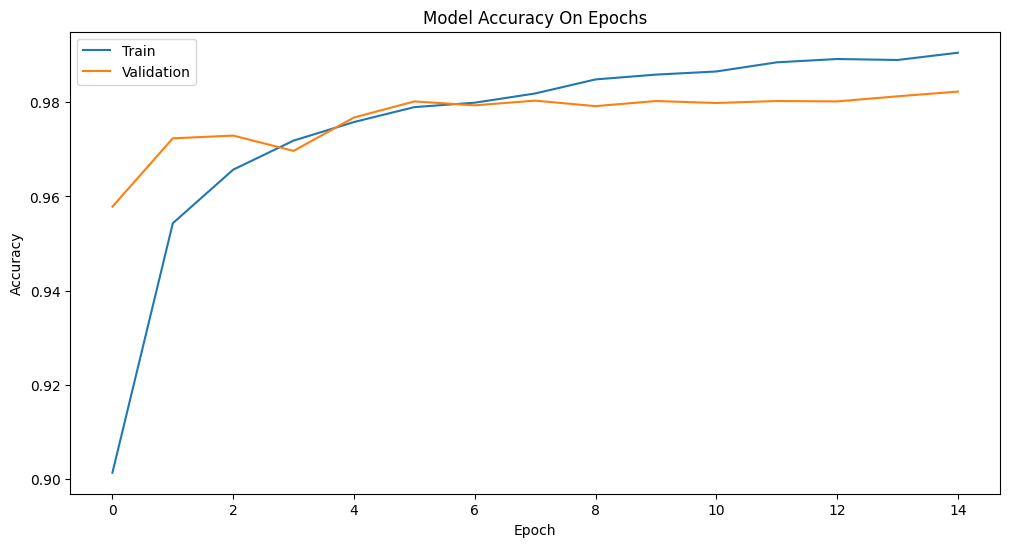

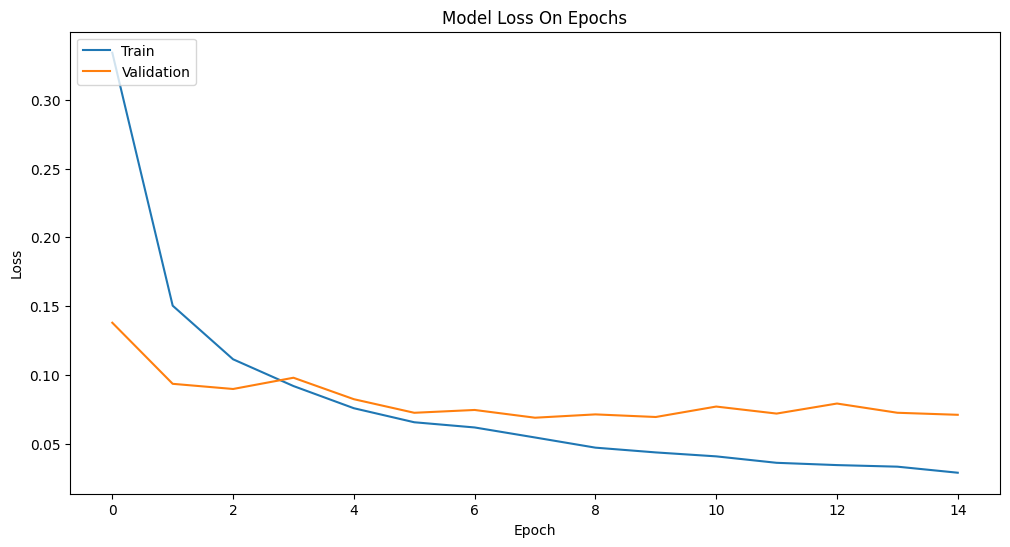

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy On Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss On Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


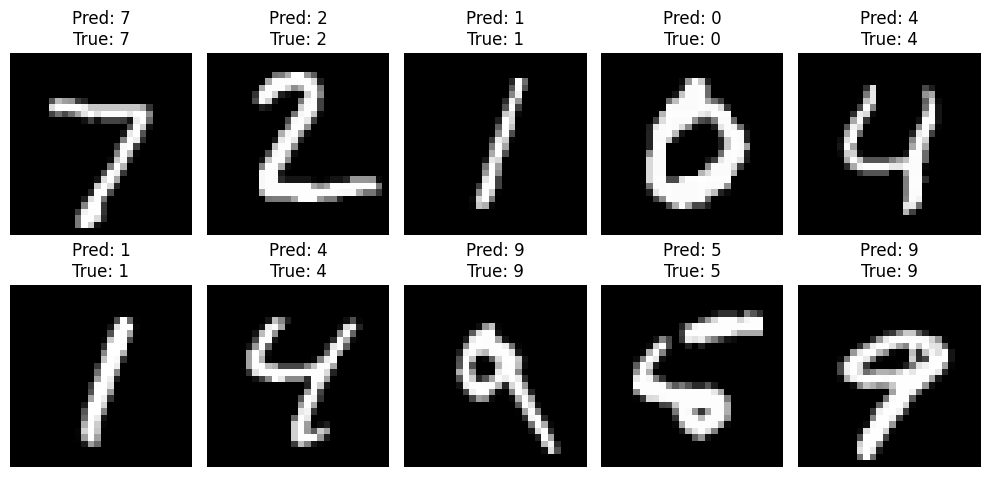

In [10]:
import numpy as np

# Get predictions for the first 10 images in the test set
predictions = model.predict(x_test_flattened[:10])

# Get the predicted digit for each image
predicted_labels = np.argmax(predictions, axis=1)

# Display the images and their predicted and true labels
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray') # Use the original 28x28 image for display
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {y_test[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()